# Project (neural etwork with keras)
In this project, we will use the Reuters Keras datasets to classify different newswires. To do this, we will split the data into training and test sets and apply different concepts acquired throughout the course (Dropout, K-fold validation, etc.).



## required libreries and importing data

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import models, layers, optimizers,regularizers
from keras.datasets import reuters
from keras.utils import to_categorical

In [10]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

##   data pre-processing and creation of the model

In [11]:
dictionary= reuters.get_word_index()
 # switch keys and words
dictionary= dict([(number,word) for word,number in dictionary.items()])

#Creation of tensor function

def tensor(reviews,words=10000):

  result=np.zeros((len(reviews),words))

  for i,words in enumerate(reviews):
    result[i,words]=1

  return result


In [12]:
x_train=tensor(train_data)
x_test=tensor(test_data)

y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)


In [13]:

#model
def create_model():
  model= models.Sequential()
  model.add(layers.Dense(128,activation="relu",input_shape=(10000,)))
  model.add(layers.Dropout(.2))
  model.add(layers.Dense(128,activation="relu"))
  model.add(layers.Dropout(.2))
  model.add(layers.Dense(128,activation="relu",kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Dense(128,activation="relu",kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Dense(46,activation="softmax"))

  adam=optimizers.Adam(learning_rate=0.0001)
  model.compile(optimizer=adam,metrics="accuracy",loss="categorical_crossentropy")

  return model


## Validation data and training the model
Now we are going to train the model and use k-fold cross validation. Finally we will plot the accuracy of the model and sumarize the conclusions.

In [14]:
historial=[]
k=2

size=len(train_data)//k
for i in range(k):
  print(f"Fold {i}")
  val_train= x_train[i*size:(i+1)*size]
  val_label= y_train[i*size:(i+1)*size]

  train= np.concatenate([x_train[:i*size],x_train[(i+1)*size:]],axis=0)
  label= np.concatenate([y_train[:i*size],y_train[(i+1)*size:]],axis=0)

  model=create_model()
  information=model.fit(train,label,validation_data=(val_train,val_label),epochs=70,batch_size=512,verbose=0)
  historial.append(information.history["val_accuracy"])




Fold 0
Fold 1


In [ ]:
historial

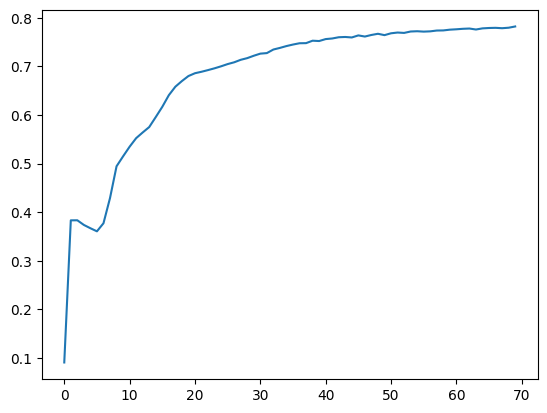

In [15]:
plot=pd.DataFrame(np.mean(historial,axis=0))
plt.plot(plot)

In [16]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 1s 7ms/step - loss: 1.4575 - accuracy: 0.7765


[1.4574573040008545, 0.7764915227890015]

## Conclusions

We can conclude that the model has an accuracy of around 78%. In a previous test run, we found that the accuracy of the model reaches a maximum with layers containing more than 64 neurons. Additionally, we found that the number of epochs needed to reach the model's maximum performance is about 60 epochs.

In conclusion, this course provided me with a wide variety of tools to create neural networks using Keras. Additionally, thanks to this course, I learned how neural networks work, what an activation function is, which activation functions are used the most, what tools are used to avoid overfitting, and the importance of a loss function and its derivative to improve the model.
Sure, here is the translation:

This course was a great start on my journey to learning about machine learning and artificial intelligence and becoming an expert.

